In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
plt.rcParams["font.family"] = 'NanumGothic'
df = gpd.read_file("SIG/TL_SCCO_SIG.shp", encoding='euc-kr')
df.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1..."


In [12]:
df['si'] = df['SIG_KOR_NM'].str[0:3]
df.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,si
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",종로구
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",중구
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",용산구
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",성동구
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1...",광진구


In [13]:
gg = pd.DataFrame()
loc = ["성남시","하남시","광주시","용인시","이천시","여주시","양평군"]
for i in loc:
    temp=df[df['si'].str.contains(i)]
    gg = gg.append(temp)

gg 

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,si
79,41131,"Sujeong-gu, Seongnam-si",성남시 수정구,"POLYGON ((968165.515 1941710.496, 968177.333 1...",성남시
80,41133,"Jungwon-gu, Seongnam-si",성남시 중원구,"POLYGON ((971787.037 1941627.348, 971794.930 1...",성남시
81,41135,"Bundang-gu, Seongnam-si",성남시 분당구,"POLYGON ((962459.288 1933176.518, 962459.447 1...",성남시
101,41450,Hanam-si,하남시,"POLYGON ((973085.483 1954673.512, 973158.061 1...",하남시
110,41610,Gwangju-si,광주시,"POLYGON ((967460.104 1927897.516, 967474.627 1...",광주시
102,41461,"Cheoin-gu, Yongin-si",용인시처인구,"POLYGON ((965242.608 1902868.747, 965243.843 1...",용인시
103,41463,"Giheung-gu, Yongin-si",용인시기흥구,"POLYGON ((961408.385 1919141.204, 961408.438 1...",용인시
104,41465,"Suji-gu, Yongin-si",용인시수지구,"POLYGON ((958355.298 1930444.111, 958363.464 1...",용인시
106,41500,Icheon-si,이천시,"POLYGON ((997562.338 1928986.116, 997563.006 1...",이천시
113,41670,Yeoju-si,여주시,"POLYGON ((1001702.361 1937472.187, 1001797.089...",여주시


In [14]:
gg['coords'] = gg['geometry'].apply(lambda x: x.representative_point().coords[:])
gg['coords'] = [coords[0] for coords in gg['coords']]


AttributeError: 'PatchCollection' object has no property 'edgehight'

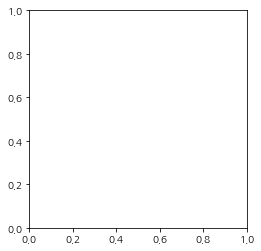

In [22]:
ax = gg.plot(edgecolor="w",column="si", cmap = 'Set2')
ax.set_title("경기동부")
ax.set_axis_off()
plt.savefig("경기동부.png", dpi=300)
